In [1]:
import pandas as pd
a=pd.read_csv("//content/user_behavior_dataset.csv")
print(a)

     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

In [2]:
a.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a['Device Model']=le.fit_transform(a['Device Model'])
a['Operating System']=le.fit_transform(a['Operating System'])
a['Gender']=le.fit_transform(a['Gender'])
print(a)

     User ID  Device Model  Operating System  App Usage Time (min/day)  \
0          1             0                 0                       393   
1          2             1                 0                       268   
2          3             3                 0                       154   
3          4             0                 0                       239   
4          5             4                 1                       187   
..       ...           ...               ...                       ...   
695      696             4                 1                        92   
696      697             3                 0                       316   
697      698             0                 0                        99   
698      699             2                 0                        62   
699      700             1                 0                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                    

In [4]:
x=a.drop("User Behavior Class",axis=1)
y=a["User Behavior Class"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)
print(x_train)
print(y_train)

     User ID  Device Model  Operating System  App Usage Time (min/day)  \
473      474             4                 1                       289   
335      336             1                 0                       531   
371      372             0                 0                       561   
369      370             4                 1                       165   
590      591             2                 0                       159   
..       ...           ...               ...                       ...   
89        90             2                 0                       301   
321      322             0                 0                       274   
450      451             2                 0                       179   
581      582             2                 0                       148   
501      502             3                 0                       420   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
473                         5.0                    

In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


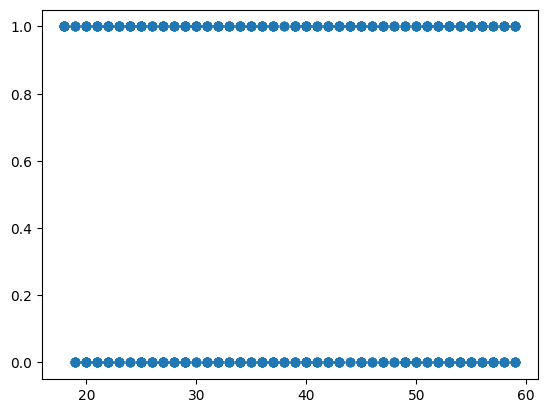

In [14]:
from matplotlib import pyplot as plt
plt.scatter(a["Age"],a["Gender"])

In [10]:
c=lr.predict([[701,1,1,122,7.09,2254,79,1500,25,1]])
print(c)

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[3 0 0 0 0]
 [1 0 1 0 0]
 [0 0 1 3 0]
 [0 0 1 2 1]
 [0 0 0 1 0]]


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.42857142857142855


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         2
           3       0.33      0.25      0.29         4
           4       0.33      0.50      0.40         4
           5       0.00      0.00      0.00         1

    accuracy                           0.43        14
   macro avg       0.28      0.35      0.31        14
weighted avg       0.35      0.43      0.38        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
